In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston_data = load_boston()
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
Y = pd.Series(boston_data.target)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train_reduced = X_train.loc[:,['RM','DIS','LSTAT']]

regr = RandomForestRegressor(max_depth = 5, n_estimators = 100)
regr.fit(X_train_reduced, Y_train)

#perm_feature_importance = permutation_importance(regr, X_train_reduced, Y_train)

X_test_reduced = X_test.loc[:,['RM','DIS','LSTAT']]
Y_predict = regr.predict(X_test_reduced)
Y_predict_train = regr.predict(X_train_reduced)


mse_train = mean_squared_error(Y_train, Y_predict_train)
mse = mean_squared_error(Y_test, Y_predict)
print(mse_train)
print(mse)

print(regr.score(X_train_reduced,Y_train))
print(regr.score(X_test_reduced,Y_test))

7.144749967075574
12.038793393573194
0.9153719791380063
0.855539477911104


In [4]:
def get_distribution(col_name, data, model):
    x = data.copy()
    sequence = np.linspace(np.min(data[col_name]), np.max(data[col_name]), len(data[col_name]))
    y_dist = []
    ice_avgs = []
    for elem in sequence:
        x[col_name] = elem
        y_temp = model.predict(x)
        y_dist.append(np.mean(y_temp))
        
        ice_avgs.append(y_temp)
        
    return sequence, y_dist, ice_avgs

In [11]:
def plot_PDP(col_name, data, model, xlabel, ylabel):
    plt.figure(figsize = (10, 8))
    plt.grid()
    res = get_distribution(col_name, data, model)
    plt.plot(res[0], res[1], lw = 2, label = 'Trend')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(fontsize = 'large')
    plt.tight_layout()

In [12]:
def plot_ICE(col_name, data, model, xlabel, ylabel):
    res = get_distribution(col_name, data, model)
    x = res[0]
    ice_avgs = res[2]
    plt.figure(figsize = (12, 8))
    plt.grid()
    for row in range(len(ice_avgs[0])):
        ys = []
        for item in range(len(ice_avgs)):
            ys.append(ice_avgs[item][row])
        plt.plot(x, ys, c = 'black', alpha = 0.1)
        
    plt.plot(res[0], res[1], lw = 5, c = 'r', label = 'Avg. Trend (PDP)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(fontsize = 'large')
    plt.tight_layout()

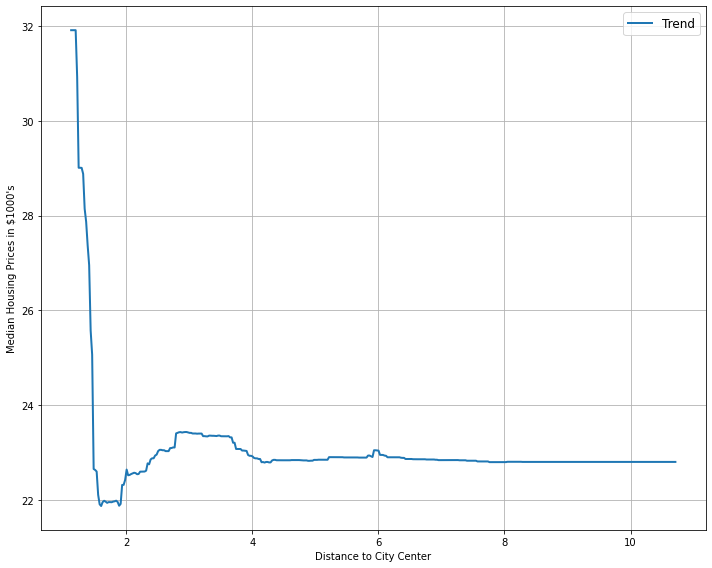

In [16]:
plot_PDP('DIS', X_train_reduced, regr, "Distance to City Center", "Median Housing Prices in $1000's")

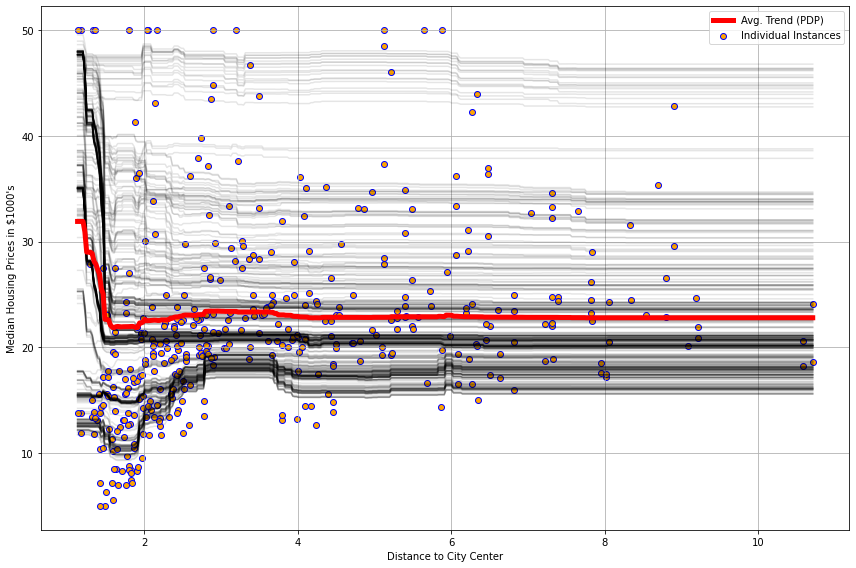

In [29]:
plot_ICE('DIS', X_train_reduced, regr, "Distance to City Center", "Median Housing Prices in $1000's")
plt.scatter(X_train_reduced['DIS'], Y_train, label = 'Individual Instances', edgecolors = 'b', color = 'orange')
plt.legend()